In [17]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import sem
import random

In [19]:
# read in the three csvs:  education data;  df of clean FIPs, df of contaminated FIPS

Education = pd.read_csv('Education.csv')
Education.head()

FIPS_Contaminated = pd.read_csv("subset_Contaminated_FIPS_df.csv")
#print(len(FIPS_Contaminated))


FIPS_Clean = pd.read_csv("Clean_Fips.csv")
FIPS_Clean.reset_index(level=0, inplace=True)
#print(len(FIPS_Clean))

In [30]:
#create an education dataframe with only the CLEAN FIPs
#Percent(1) = some high school
#Percent(2) = diploma
#Percent(3) = some college
#Percent(4) = college graduate or higher

FIPs_clean_education = Education.loc[Education["FIPS Code"].isin(FIPS_Clean["FIPS"])==True]
#FIPs_clean_education.sort_values(["FIPS Code"])

    

In [31]:
#create an education dataframe with only the CONTAMINATED FIPS

FIPs_contaminated_education = Education.loc[Education["FIPS Code"].isin(FIPS_Contaminated["SEMS_ACTIVE_SITES.SITE_FIPS_CODE"])==True]
FIPs_contaminated_education.sort_values(["FIPS Code"])
#FIPs_clean_education.count()

In [49]:
# get the average education for each sample set

CleanP1 = np.mean(FIPs_clean_education["Percent(1)"])
CleanP2 = np.mean(FIPs_clean_education["Percent(2)"])
CleanP3 = np.mean(FIPs_clean_education["Percent(3)"])
CleanP4 = np.mean(FIPs_clean_education["Percent(4)"])
#CleanP4

ContP1 = np.mean(FIPs_contaminated_education["Percent(1)"])
ContP2 = np.mean(FIPs_contaminated_education["Percent(2)"])
ContP3 = np.mean(FIPs_contaminated_education["Percent(3)"])
ContP4 = np.mean(FIPs_contaminated_education["Percent(4)"])
#ContP4

#create a dataframe
x_axis = ["Some High School", "High School Diploma", "Some College", "College Graduate or Higher"]
y_axis_df = pd.DataFrame({
    
    "Clean FIPS":[CleanP1, CleanP2, CleanP3, CleanP4],
    "Contaminated FIPS": [ContP1, ContP2, ContP3, ContP4]
    
}, index= x_axis)
y_axis_df


,Clean FIPS,Contaminated FIPS
Some High School,14.395960,11.619192
High School Diploma,35.059596,28.929293
Some College,31.088889,31.035354
College Graduate or Higher,19.462626,28.414141


Text(0, 0.5, 'Average Percentage per Sample')

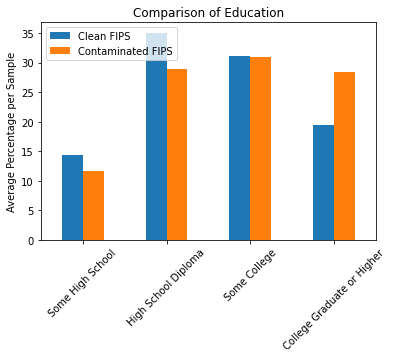

In [51]:

# create a multiplot bar chart for the four levels of education for each Sample

PLOT = y_axis_df.plot.bar(rot=45)
PLOT

plt.title("Comparison of Education")
plt.ylabel("Average Percentage per Sample")

